In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

# gradient descent on pdfs

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [15]:
data = pd.read_csv('PDFMalware2022.csv').dropna()
data.columns

Index(['Fine name', 'pdfsize', 'metadata size', 'pages', 'xref Length',
       'title characters', 'isEncrypted', 'embedded files', 'images', 'text',
       'header', 'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer',
       'startxref', 'pageno', 'encrypt', 'ObjStm', 'JS', 'Javascript', 'AA',
       'OpenAction', 'Acroform', 'JBIG2Decode', 'RichMedia', 'launch',
       'EmbeddedFile', 'XFA', 'Colors', 'Class'],
      dtype='object')

In [16]:
for col in data.drop(columns=['Fine name', 'text', 'header', 'Class']).columns:
    print(f"Column: {col} - {data[col].unique()}")

Column: pdfsize - [ 8.0000e+00  1.5000e+01  4.0000e+00  1.7000e+01  7.0000e+00  1.4000e+01
  2.0480e+03  6.0000e+00  2.0000e+00  5.0000e+00  4.1000e+01  1.0000e+01
  1.2000e+01  1.0000e+00  1.3000e+01  1.3800e+02  5.1000e+01  8.9000e+01
  1.1000e+01  3.0000e+01  3.7000e+01  9.0000e+00  1.6000e+01  3.0000e+00
  2.1000e+01  2.3000e+01  7.4000e+01  7.6000e+01  6.2000e+01  7.8000e+01
  3.8000e+01  2.1600e+02  2.7500e+02  7.7000e+01  1.2250e+03  3.1000e+01
  8.7000e+01  7.3000e+01  1.5400e+02  5.6000e+01  3.5500e+02  4.4000e+01
  6.4800e+02  3.0500e+02  2.6000e+01  1.3200e+02  2.7000e+01  2.2000e+01
  1.9300e+02  1.9000e+01  0.0000e+00  8.3000e+01  8.0000e+01  2.9000e+01
  1.3700e+02  4.7000e+01  1.3300e+02  9.4000e+01  1.0000e+02  3.0600e+02
  3.5000e+01  2.1000e+02  2.4000e+01  7.9000e+01  3.3000e+01  4.2000e+01
  3.6000e+01  4.0000e+02  3.4000e+01  9.5000e+01  4.6000e+01  4.5000e+01
  7.5000e+01  8.1000e+01  2.4000e+02  5.8000e+01  2.3200e+02  1.4600e+02
  4.0000e+01  1.2600e+02  5.7000e

In [17]:
new_labels = {'Malicious': 1, 'Benign': 0}
data['Class'] = data['Class'].map(new_labels)
# columns = ['images', 'obj', 'endobj', 'endstream', 'xref', 'startxref', 'pageno', 'JS', 'Javascript', 'AA', 'OpenAction', 'Acroform', 
#            'JBIG2Decode', 'RichMedia', 'launch', 'XFA']

#new_labels = [
#    {'1(1)': '1'},
#    {'(most': '-1', '_Pro_Rodeo_Pix_': '-1'},
#    {'pdfid.py': '-1'},
#    {'1(1)': '1', 'pdfHeader)': '-1'},
#    {'pdfid.py': '-1'},
#    {'bytes[endHeader]': '-1'},
#    {}
#]

new_labels = {'1(1)': '1', '2(1)': '2', '3(1)': '3', '29(2)': '29', '34(2)': '34', '2(2)': '2', '>': '-1', '53(1)': '53', '5(1)': '5', '12(2)': '2', '53(2)': '53', 
              '(most': '-1', '_Pro_Rodeo_Pix_': '-1', "_Pro_Rodeo_Pix_'": '-1', 'pdfid.py': '-1', 'pdfHeader)': '-1', 'bytes[endHeader]': '-1', 'list': -1}
# data['JS'] = data['JS'].map(new_labels)
# data['Javascript'] = data['Javascript'].map(new_labels)
for col in data.drop(columns=['Class']).columns:
    data[col] = data[col].replace(new_labels)

data.head()

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,...,0,1,0,0,0,0,0,0,0.0,1
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,...,0,0,1,0,0,0,8,1,0.0,1
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,1
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,...,0,1,1,0,0,0,0,0,0.0,1
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,1


In [5]:
data.describe()

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,stream,trailer,encrypt,ObjStm,Colors,Class
count,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000
mean,87.225581,334.130101,3.398583,2728.630650,51.487479,-0.020852,-0.006485,17.341215,1.203532,-0.043500,1.516811,2.087000,0.554225
std,444.239972,1566.007897,11.903610,18108.388189,1354.775001,0.206809,0.257123,35.330169,1.370455,0.256045,7.633485,58.178074,0.497076
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,9.000000,180.000000,1.000000,12.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,265.000000,1.000000,21.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,80.000000,319.000000,2.000000,77.000000,13.000000,0.000000,0.000000,18.000000,2.000000,0.000000,0.000000,0.000000,1.000000
max,23816.000000,77185.000000,595.000000,263987.000000,76993.000000,4.000000,5.000000,812.000000,46.000000,2.000000,600.000000,5682.000000,1.000000


In [6]:
class_data = data.drop(columns=['Fine name', 'text', 'header', 'Class'])

x_train, x_test, y_train, y_test = train_test_split(class_data, data['Class'], test_size=0.2, random_state=77)
x_train.shape

(8018, 29)

In [7]:
# Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)

nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred)
nb_recall = recall_score(y_test, y_pred)
nb_f1 = f1_score(y_test, y_pred)

print(f"""Naive Bayes scores
      accuracy score: {nb_accuracy}
      precision score: {nb_precision}
      recall score: {nb_recall}
      f1 score: {nb_recall}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")


Naive Bayes scores
      accuracy score: 0.627930174563591
      precision score: 0.9422632794457275
      recall score: 0.36138175376439324
      f1 score: 0.36138175376439324

Confusion matrix:
[[851  25]
 [721 408]]


In [8]:
tree = DecisionTreeClassifier(max_depth=100)
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)

dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)

print(f"""Decision tree scores
      accuracy score: {dt_accuracy}
      precision score: {dt_precision}
      recall score: {dt_recall}
      f1 score: {dt_f1}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

Decision tree scores
      accuracy score: 0.9885286783042394
      precision score: 0.9885159010600707
      recall score: 0.9911426040744021
      f1 score: 0.9898275099513489

Confusion matrix:
[[ 863   13]
 [  10 1119]]


In [9]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print(f"""Random forest scores
      accuracy score: {rf_accuracy}
      precision score: {rf_precision}
      recall score: {rf_recall}
      f1 score: {rf_f1}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

Random forest scores
      accuracy score: 0.9930174563591022
      precision score: 0.9946761313220941
      recall score: 0.9929140832595217
      f1 score: 0.9937943262411347

Confusion matrix:
[[ 870    6]
 [   8 1121]]


In [10]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

print(f"""KNN scores
      accuracy score: {knn_accuracy}
      precision score: {knn_precision}
      recall score: {knn_recall}
      f1 score: {knn_recall}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

KNN scores
      accuracy score: 0.9670822942643391
      precision score: 0.9758281110116384
      recall score: 0.9654561558901683
      f1 score: 0.9654561558901683

Confusion matrix:
[[ 849   27]
 [  39 1090]]


In [37]:
hidden_layers = (500, 250)
activation = 'tanh'
solver = 'adam'

mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, activation=activation, solver=solver)
mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_test)

mlp_accuracy = accuracy_score(y_test, y_pred)
mlp_precision = precision_score(y_test, y_pred)
mlp_recall = recall_score(y_test, y_pred)
mlp_f1 = f1_score(y_test, y_pred)

print(f"""MLP scores
      accuracy score: {mlp_accuracy}
      precision score: {mlp_precision}
      recall score: {mlp_recall}
      f1 score: {mlp_recall}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

MLP scores
      accuracy score: 0.9745635910224439
      precision score: 0.9926873857404022
      recall score: 0.9619131975199291
      f1 score: 0.9619131975199291

Confusion matrix:
[[ 868    8]
 [  43 1086]]


In [86]:
positive_label = class_data.iloc[0].to_numpy()
negative_label = class_data.iloc[-1].to_numpy()

test_labels = np.array([positive_label, negative_label])
y = np.array([[1], [0]])

svc = SVC()
svc.fit(test_labels, y)

y_pred = svc.predict(x_test)
confusion_matrix(y_test, y_pred)

/home/paul/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/paul/.local/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([[  93,  804],
       [   4, 1104]])

In [87]:
test_data_svm = data.sample(frac=1).reset_index(drop=True)[:3000]
print(test_data_svm['Malware'])
used_data_svm = test_data_svm.drop(columns=['Name', 'Machine', 'TimeDateStamp', 'Malware'])
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(used_data_svm, test_data_svm['Malware'], test_size=0.2, random_state=69)

svc = SVC()
svc.fit(x_train_svm, y_train_svm)

y_pred = svc.predict(x_test_svm)
confusion_matrix(y_test_svm, y_pred)

KeyError: 'Malware'

In [12]:
# SVM
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)

print(f"""SVM scores
      accuracy score: {svm_accuracy}
      precision score: {svm_precision}
      recall score: {svm_recall}
      f1 score: {svm_recall}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")


SVM scores
      accuracy score: 0.6628428927680798
      precision score: 0.6276056338028169
      recall score: 0.9867139061116031
      f1 score: 0.9867139061116031

Confusion matrix:
[[ 215  661]
 [  15 1114]]


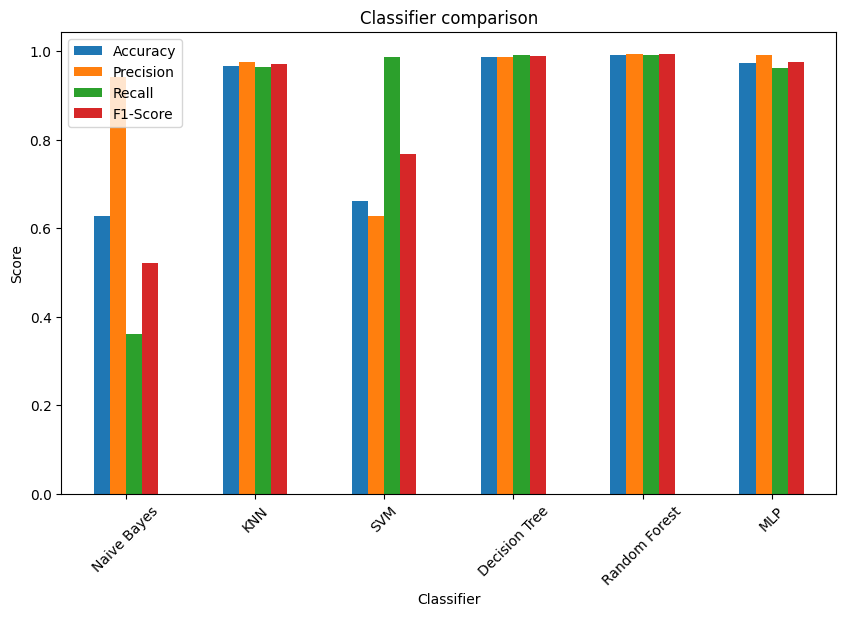

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

results = {
    "Classifier": ["Naive Bayes", "KNN", "SVM", "Decision Tree", "Random Forest", "MLP"],
    "Accuracy": [nb_accuracy, knn_accuracy, svm_accuracy, dt_accuracy, rf_accuracy, mlp_accuracy],
    "Precision": [nb_precision, knn_precision, svm_precision, dt_precision, rf_precision, mlp_precision],
    "Recall": [nb_recall, knn_recall, svm_recall, dt_recall, rf_recall, mlp_recall],
    "F1-Score": [nb_f1, knn_f1, svm_f1, dt_f1, rf_f1, mlp_f1]
}
df_results = pd.DataFrame(results)

##Code to display the results
df_results.plot(kind='bar', x='Classifier', figsize=(10, 6))
plt.title('Classifier comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_244052/2332541769.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')


Text(0.5, 1.0, 'Features importance')

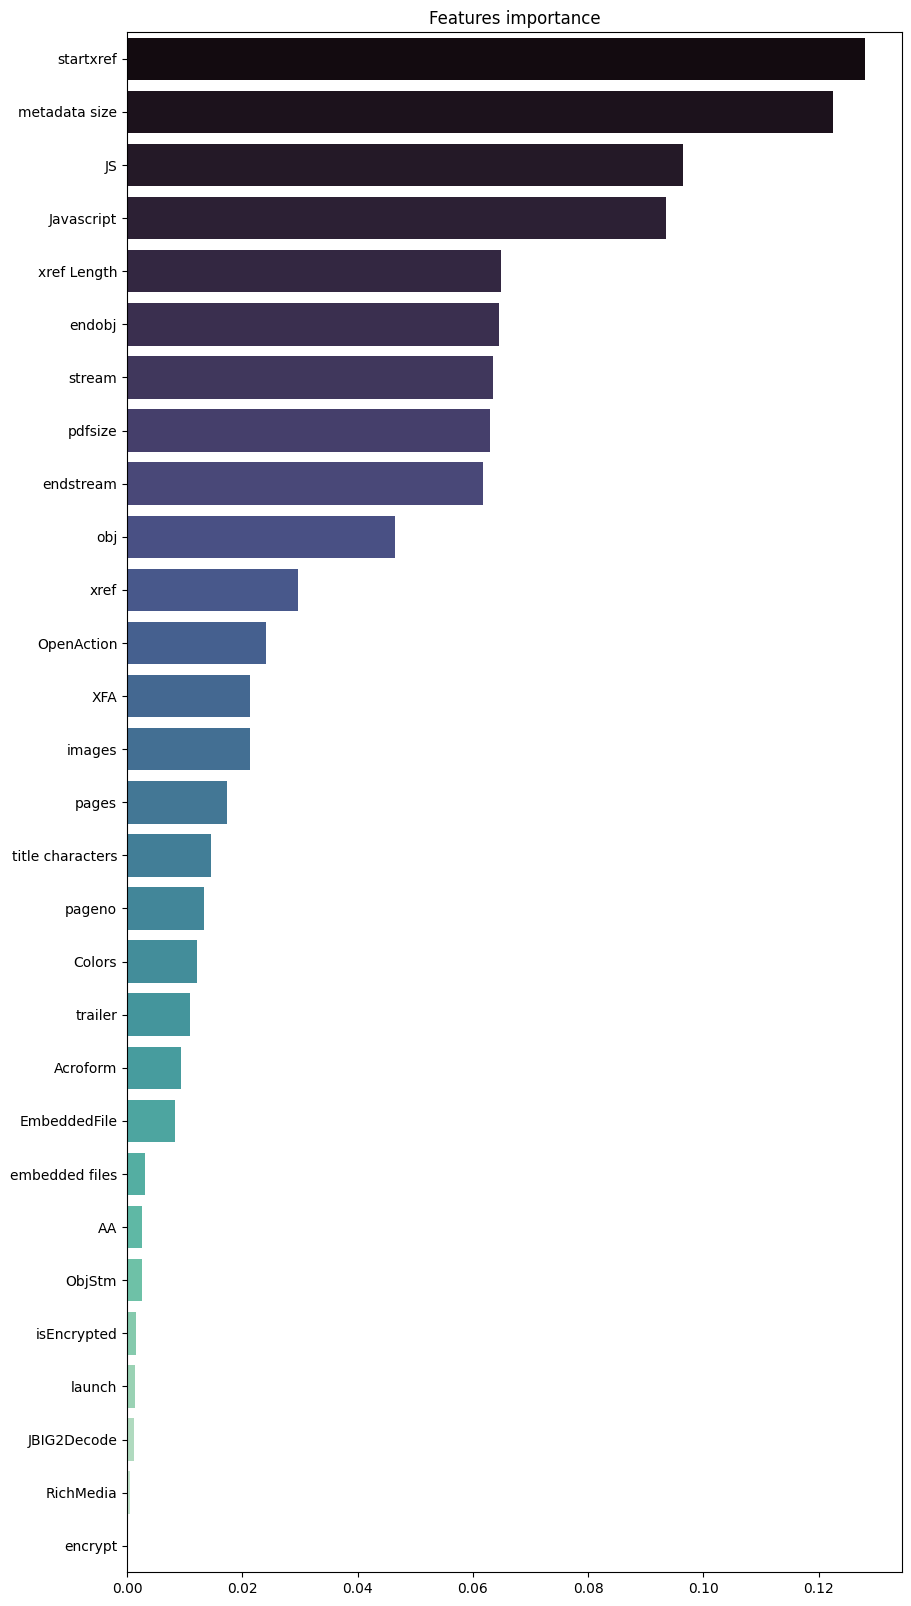

In [90]:
# Feature importance
importance = rf.feature_importances_
importance_dict = {class_data.columns.values[i]: importance[i] for i in range (len(importance))}
sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
plt.figure(figsize=(10, 20))
sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')
plt.title('Features importance')

